# **Importacion De Librerias y Datos**

In [1]:
!pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
import openpyxl

# Definir los tipos de dato para las columnas relevantes en df_salud
dtypes_salud = {
    'Concepto_Factura_Desc': 'category',
    'CODIGO_PROCEDIMIENTO': 'category',
    'Cantidad': 'float64',
    'TIPIFICACION': 'category',
    'DSTIPO_EXAMEN': 'category',
    'Siniestro_Diagnosti_Princi_Id': 'category',
    'MUNICIPIO': 'category',
    'Nombre_Departamento_IPS': 'category',
    'Geogra_Municipio_Id': 'category',
    'Nombre_Tipo_Atencion_Arp': 'category'
}

# Seleccionar solo las columnas relevantes para df_salud
cols_to_use_salud = [
    'FECHA_ATENCION',              # Fecha y hora del servicio
    'Concepto_Factura_Desc',      # Tipo de atención
    'CODIGO_PROCEDIMIENTO',         # Código del procedimientod
    'Cantidad',                    # Volumen o cantidad del servicio
    'TIPIFICACION',                # Clasificación adicional del servicio
    'DSTIPO_EXAMEN',
    'Siniestro_Diagnosti_Princi_Id',     # Identificador del diagnóstico/siniestro
    'MUNICIPIO',        # Municipio descriptivo de la IPS
    'Nombre_Departamento_IPS',     # Departamento descriptivo de la IPS
    'Geogra_Municipio_Id',         # Identificador estandarizado del municipio
    'Concepto_Factura_Desc',
    'Nombre_Tipo_Atencion_Arp'
]

# Leer el archivo CSV de df_salud
df_salud = pd.read_csv(
    "/kaggle/input/data-sura/1.Informacion Salud 2019-2024-001.txt",
    delimiter='|',
    usecols=cols_to_use_salud,
    dtype=dtypes_salud,
    parse_dates=['FECHA_ATENCION']
)

# Definir los tipos de dato para el dataset de prestadores
dtypes_prestadores = {
    'Concepto_Factura_Desc': 'category',
    'Geogra_Municipio_Id': 'category',
    'max_cantidad': 'float64'
}

# Seleccionar solo las columnas relevantes para df_prestadores
cols_to_use_prestadores = ['Concepto_Factura_Desc', 'Geogra_Municipio_Id', 'max_cantidad']

# Leer el archivo CSV de df_prestadores
df_prestadores = pd.read_excel(
    "/kaggle/input/data-sura/2.Red Prestadores.xlsx",
    usecols=cols_to_use_prestadores,
    dtype=dtypes_prestadores
)

# **Analisis Exploratorio De Datos (EDA)**

In [3]:
# Vista previa de cada dataset
print("DF Salud:")
display(df_salud.head())
print("dtypes:")
print(df_salud.dtypes)


print("DF Prestadores:")
display(df_prestadores.head())
print("dtypes:")
print(df_prestadores.dtypes)

DF Salud:


,Siniestro_Diagnosti_Princi_Id,Nombre_Tipo_Atencion_Arp,Nombre_Departamento_IPS,Nombre_Establecimiento,Nombre_Municipio_Establecimiento,FECHA_ATENCION,DSTIPO_EXAMEN,CODIGO_PROCEDIMIENTO,Concepto_Factura_Desc,TIPIFICACION,Cantidad,Geogra_Municipio_Id,MUNICIPIO
0,G560,AMBULATORIA,ANTIOQUIA,21539c4082,?,2019-07-12 06:20:00,?,?,MSI -MEDICO SEGUIMIENTO INTEGRAL,CITAS FRONT,1.0,586,BOGOTA
1,S626,QUIRURGICO AMBULATORIO,ANTIOQUIA,a8f2d23df3,?,2019-06-18 11:08:00,SESION FISIOTERAPIA,FISI,SESIONES DE FISIOTERAPIA,CITAS BACK,2.0,586,BOGOTA
2,S835,QUIRURGICO AMBULATORIO,BOGOTA D.C.,c91884bd59,?,2019-03-05 07:20:00,?,?,CONSULTA ORTOPEDISTA,CITAS BACK,1.0,586,BOGOTA
3,M751,QUIRURGICO AMBULATORIO,CAUCA,03bda117d5,?,2019-10-05 10:03:00,?,?,CONSULTA NO PROGRAMADA,URGENCIAS FRONT,1.0,834,SANTIAGO DE CALI
4,M545,AMBULATORIA,VALLE DEL CAUCA,fd38d78dc4,?,2019-06-25 07:13:00,COLUMNA LUMBOSACRA,RSIM,RADIOGRAFIA,URGENCIAS FRONT,1.0,2546,GUACARI


dtypes:
Siniestro_Diagnosti_Princi_Id             category
Nombre_Tipo_Atencion_Arp                  category
Nombre_Departamento_IPS                   category
Nombre_Establecimiento                    category
Nombre_Municipio_Establecimiento          category
FECHA_ATENCION                      datetime64[ns]
DSTIPO_EXAMEN                             category
CODIGO_PROCEDIMIENTO                      category
Concepto_Factura_Desc                     category
TIPIFICACION                              category
Cantidad                                   float64
Geogra_Municipio_Id                       category
MUNICIPIO                                 category
dtype: object
DF Prestadores:


,Concepto_Factura_Desc,Geogra_Municipio_Id,max_cantidad
0,URGENCIAS MEDICO GENERAL,834,51.0
1,OTROS PROCEDIMIENTOS HOSPITALARIOS,834,2.0
2,MEDICAMENTOS AMBULATORIOS,834,5961.0
3,PROCEDIMIENTOS ESPECIALIZADOS AMBULATORI,834,1.0
4,MEDICAMENTO CONTROL ESTUPEFACIENTES (L),834,1.0


dtypes:
Concepto_Factura_Desc    category
Geogra_Municipio_Id      category
max_cantidad              float64
dtype: object


In [4]:
# Información general de los DataFrame
print("Información de df_salud:")
df_salud.info()

print("Informacion de Prestadores")
df_prestadores.info()

# Estadísticas descriptivas (numéricas y algunas categóricas)
print("Estadísticas descriptivas de df_salud:")
display(df_salud.describe(include='all'))

print("Estadísticas descriptivas de df_salud:")
display(df_prestadores.describe(include='all'))

Información de df_salud:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11716416 entries, 0 to 11716415
Data columns (total 13 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   Siniestro_Diagnosti_Princi_Id     category      
 1   Nombre_Tipo_Atencion_Arp          category      
 2   Nombre_Departamento_IPS           category      
 3   Nombre_Establecimiento            category      
 4   Nombre_Municipio_Establecimiento  category      
 5   FECHA_ATENCION                    datetime64[ns]
 6   DSTIPO_EXAMEN                     category      
 7   CODIGO_PROCEDIMIENTO              category      
 8   Concepto_Factura_Desc             category      
 9   TIPIFICACION                      category      
 10  Cantidad                          float64       
 11  Geogra_Municipio_Id               category      
 12  MUNICIPIO                         category      
dtypes: category(11), datetime64[ns](1), float64(1

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Siniestro_Diagnosti_Princi_Id,Nombre_Tipo_Atencion_Arp,Nombre_Departamento_IPS,Nombre_Establecimiento,Nombre_Municipio_Establecimiento,FECHA_ATENCION,DSTIPO_EXAMEN,CODIGO_PROCEDIMIENTO,Concepto_Factura_Desc,TIPIFICACION,Cantidad,Geogra_Municipio_Id,MUNICIPIO
count,11716413,11716413,11716413,11716413,11716413,11716410,11716413,11716413,11716413,11716413,1.171642e+07,11716416,11716416
unique,954,8,33,2828,250,NaN,190,13,422,10,NaN,1096,1095
top,G560,AMBULATORIA,ANTIOQUIA,SIN DATO,?,NaN,?,?,MEDICAMENTOS AMBULATORIOS,URGENCIAS FRONT,NaN,586,BOGOTA
freq,561662,6212549,6674509,3182106,9010971,NaN,9374797,9374797,1662060,3683921,NaN,2500073,2500073
mean,NaN,NaN,NaN,NaN,NaN,2022-03-30 17:29:59.717806336,NaN,NaN,NaN,NaN,1.327334e+00,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2020-10-30 14:00:00,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2022-05-11 12:40:00,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2023-09-26 15:00:00,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,2024-12-31 22:35:00,NaN,NaN,NaN,NaN,9.600000e+01,NaN,NaN


Estadísticas descriptivas de df_salud:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Concepto_Factura_Desc,Geogra_Municipio_Id,max_cantidad
count,298279,298279,297833.000000
unique,471,1104,NaN
top,URGENCIAS MEDICO GENERAL,586,NaN
freq,13041,8010,NaN
mean,NaN,NaN,15.931250
std,NaN,NaN,520.678384
min,NaN,NaN,1.000000
25%,NaN,NaN,1.000000
50%,NaN,NaN,2.000000
75%,NaN,NaN,4.000000


**Analisis de Valores Nulos Y Duplicados**

In [5]:
# Valores nulos
print("Valores nulos de datos de Salud")
df_salud.isnull().sum()
print("Valores nulos de datos de Prestadores")
df_prestadores.isnull().sum

Valores nulos de datos de Salud
Valores nulos de datos de Prestadores


<bound method DataFrame.sum of         Concepto_Factura_Desc  Geogra_Municipio_Id  max_cantidad
0                       False                False         False
1                       False                False         False
2                       False                False         False
3                       False                False         False
4                       False                False         False
...                       ...                  ...           ...
298274                  False                False         False
298275                  False                False         False
298276                  False                False         False
298277                  False                False         False
298278                  False                False         False

[298279 rows x 3 columns]>

In [6]:
print("Duplicados de datos de Salud")
df_salud.duplicated()
print("DUplicados de datos de Prestadores")
df_prestadores.duplicated()

Duplicados de datos de Salud
DUplicados de datos de Prestadores


0         False
1         False
2         False
3         False
4         False
          ...  
298274     True
298275     True
298276    False
298277     True
298278     True
Length: 298279, dtype: bool

In [7]:
# Estadísticas de capacidad máxima
display(df_prestadores["max_cantidad"].describe())

count    297833.000000
mean         15.931250
std         520.678384
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max      223996.000000
Name: max_cantidad, dtype: float64

# Graficas (EDA)

**Datos de Salud**

**Tipos de Atencion Medica mas Comunes**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


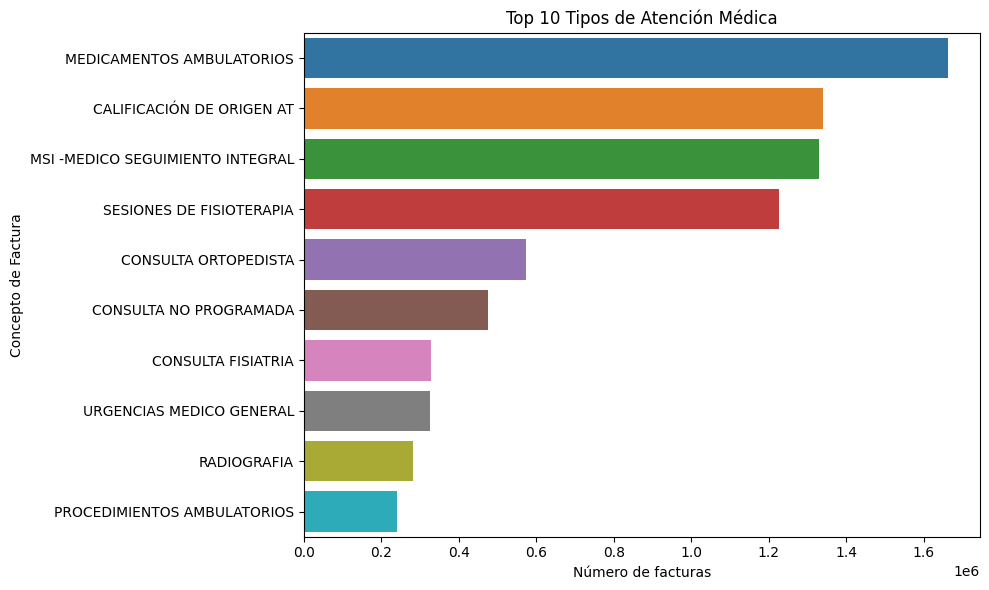

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Identifica las 10 etiquetas más comunes
top10 = df_salud["Concepto_Factura_Desc"].value_counts().nlargest(10).index

# 2) Filtra el DataFrame para quedarte sólo con esas 10
df_top10 = df_salud[df_salud["Concepto_Factura_Desc"].isin(top10)]

# 3) Grafica con orden fijo en las barras
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_top10,
    y="Concepto_Factura_Desc",
    order=top10
)
plt.title("Top 10 Tipos de Atención Médica")
plt.xlabel("Número de facturas")
plt.ylabel("Concepto de Factura")
plt.tight_layout()
plt.show()

**Distribucion de categorias de CIE-10**

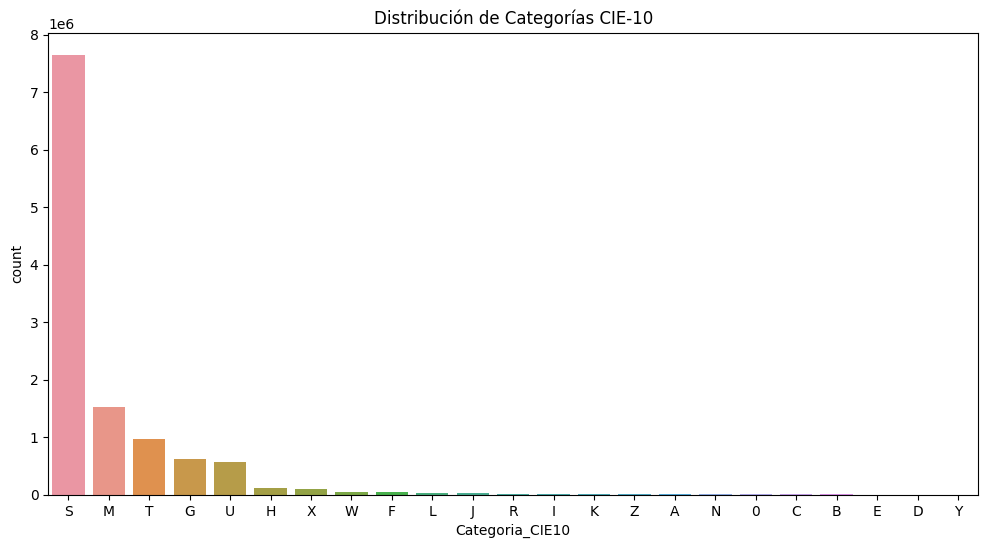

In [9]:
# Agrupar códigos CIE-10 por categoría (ejemplo: primera letra)
df_salud["Categoria_CIE10"] = df_salud["Siniestro_Diagnosti_Princi_Id"].str[0]

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=df_salud, x="Categoria_CIE10", order=df_salud["Categoria_CIE10"].value_counts().index)
plt.title("Distribución de Categorías CIE-10")
plt.show()

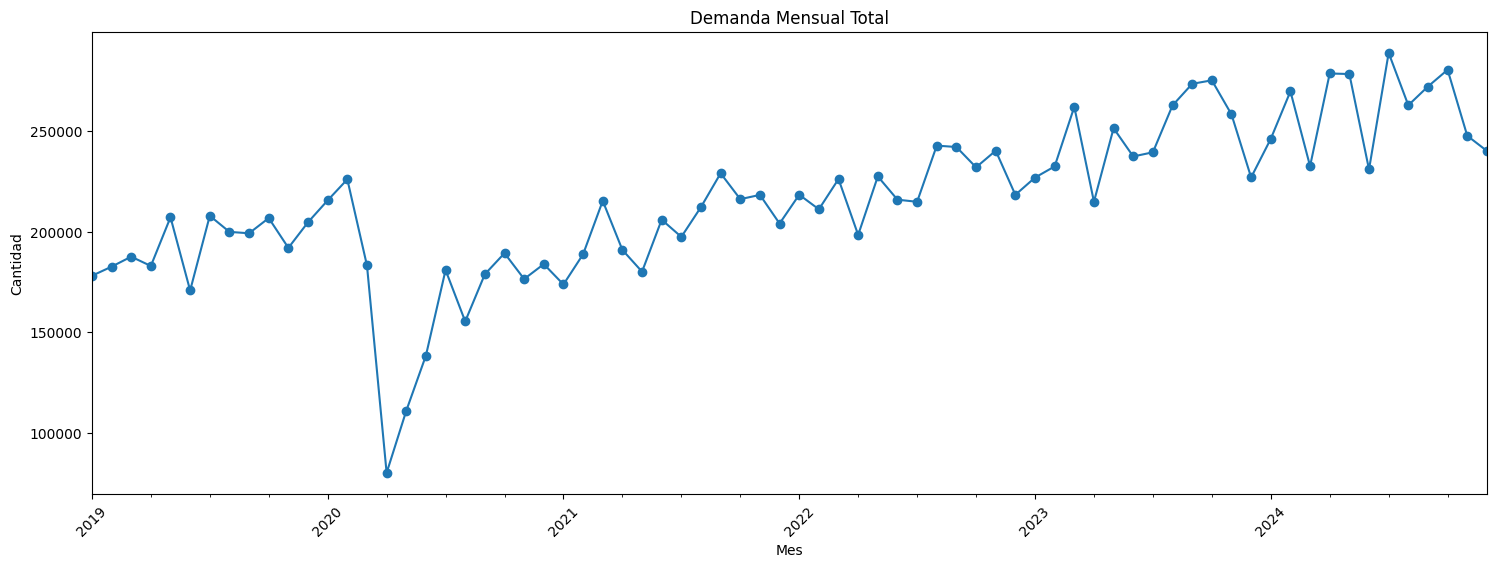

In [10]:
# Asegurarse de que FECHA_ATENCION es datetime (ya se parseó en la carga)
df_salud['Mes'] = df_salud['FECHA_ATENCION'].dt.to_period('M')

# Agrupar la demanda (Cantidad) por mes
demanda_por_mes = df_salud.groupby('Mes')['Cantidad'].sum().sort_index()

plt.figure(figsize=(18,6))
demanda_por_mes.plot(marker='o')
plt.title("Demanda Mensual Total")
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


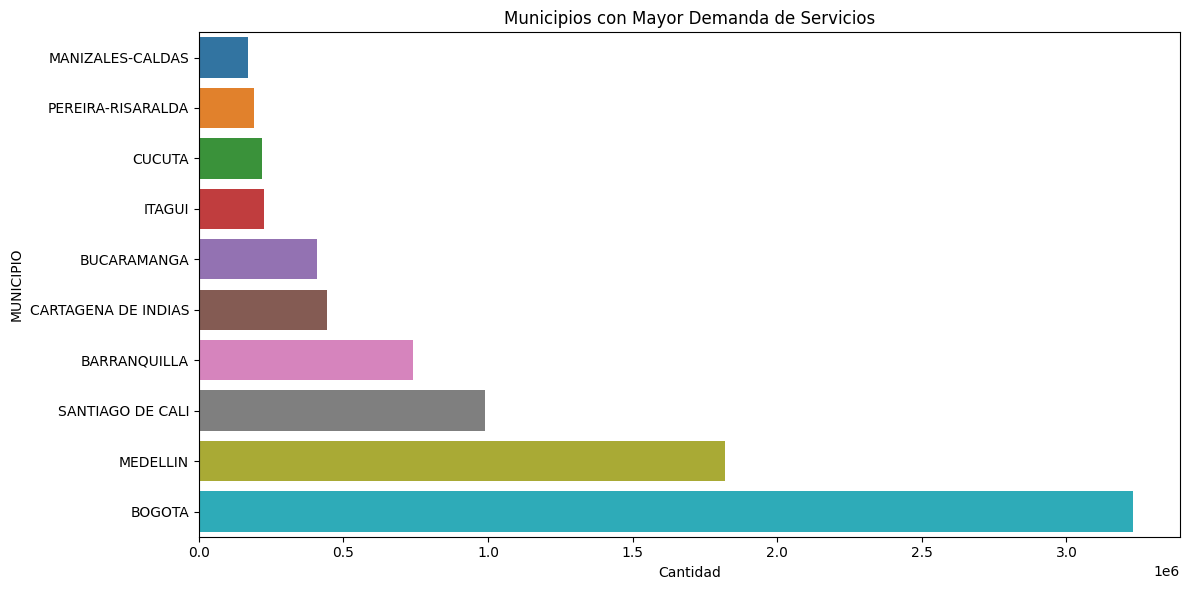

In [11]:
# Agrupar y sumar las cantidades por municipio
demanda_municipio = (
    df_salud
    .groupby("MUNICIPIO", observed=True)["Cantidad"]
    .sum()
    .reset_index()
)

# Obtener los 10 municipios con mayor demanda
top10 = demanda_municipio.nlargest(10, "Cantidad")

#print(top10)

# Ordenar los valores para el gráfico (opcional, dependiendo de la preferencia)
top10 = top10.sort_values("Cantidad", ascending=True)

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10,
    x="Cantidad",
    y="MUNICIPIO",
    order=top10["MUNICIPIO"]  # Asegura el orden correcto
)
plt.title("Municipios con Mayor Demanda de Servicios")
plt.tight_layout()  # Mejora el espacio del gráfico
plt.show()

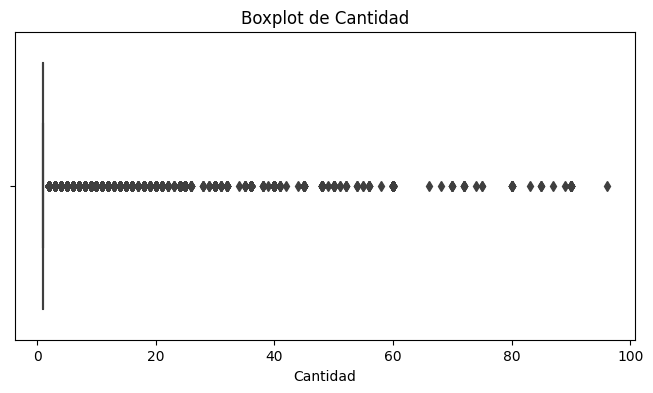

In [12]:
# Boxplot para detectar outliers en Cantidad
plt.figure(figsize=(8,4))
sns.boxplot(x=df_salud['Cantidad'])
plt.title("Boxplot de Cantidad")
plt.show()

**Tendencias por tipo de servicio médico**

<ipython-input-13-c43f8a06da5a>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tendencia_por_tipo = df_salud.groupby(['Mes', 'Concepto_Factura_Desc'])['Cantidad'].sum().reset_index()
<ipython-input-13-c43f8a06da5a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tendencia_por_tipo_top['Mes'] = tendencia_por_tipo_top['Mes'].astype(str)


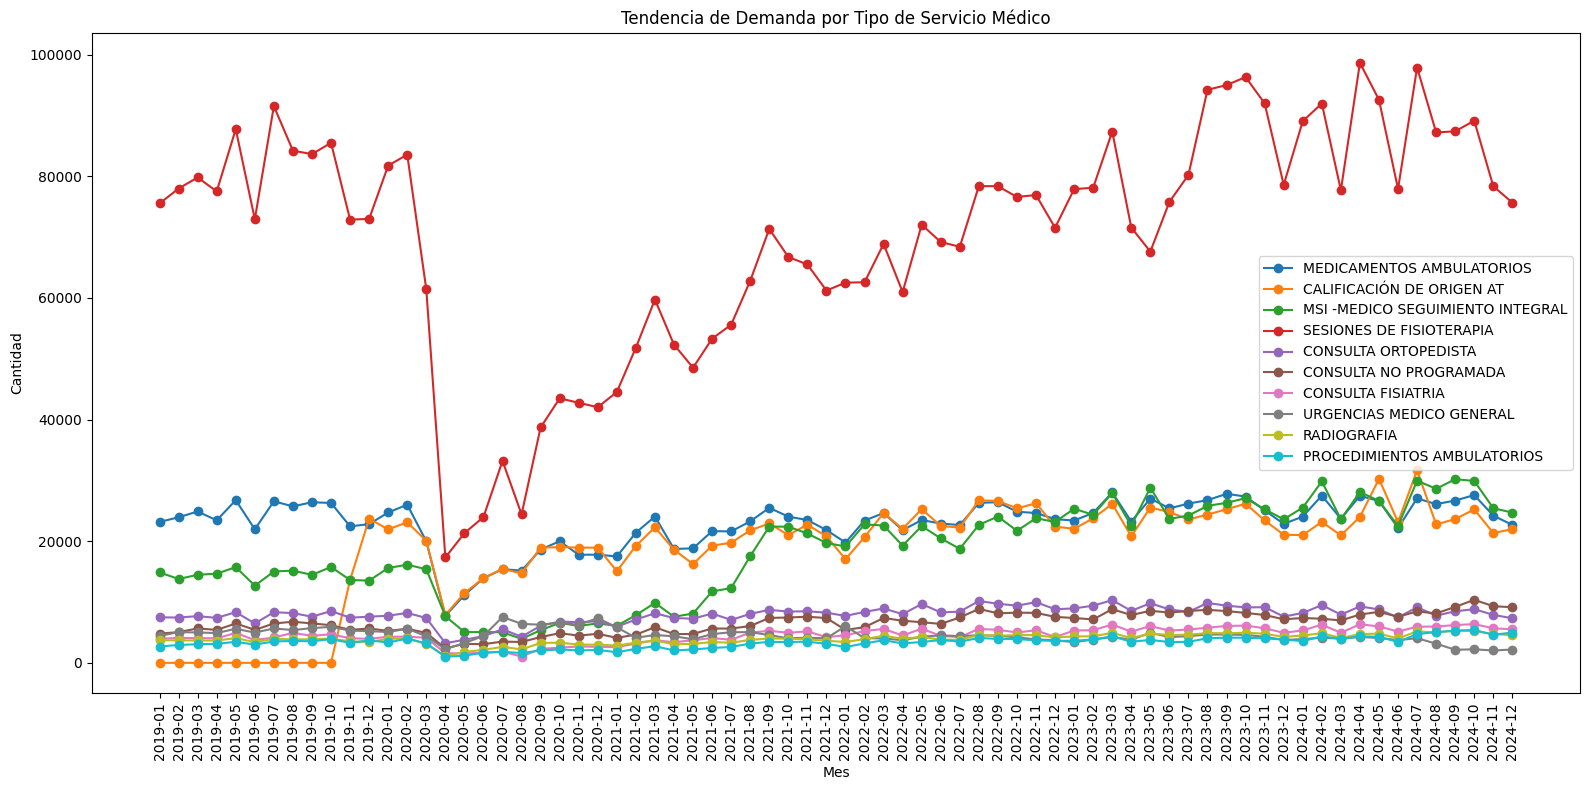

In [13]:
# Asegurarse de que FECHA_ATENCION es datetime
df_salud['Mes'] = df_salud['FECHA_ATENCION'].dt.to_period('M')

# Agrupar por mes y tipo de atención
tendencia_por_tipo = df_salud.groupby(['Mes', 'Concepto_Factura_Desc'])['Cantidad'].sum().reset_index()

# Obtener los 10 tipos de atención más comunes para simplificar la visualización
top_tipos = df_salud['Concepto_Factura_Desc'].value_counts().nlargest(10).index

# Filtrar solo los tipos top
tendencia_por_tipo_top = tendencia_por_tipo[tendencia_por_tipo['Concepto_Factura_Desc'].isin(top_tipos)]

# Convertir Mes a string para mejor visualización
tendencia_por_tipo_top['Mes'] = tendencia_por_tipo_top['Mes'].astype(str)

# Crear gráfico de líneas
plt.figure(figsize=(16, 8))
for tipo in top_tipos:
    data = tendencia_por_tipo_top[tendencia_por_tipo_top['Concepto_Factura_Desc'] == tipo]
    plt.plot(data['Mes'], data['Cantidad'], marker='o', label=tipo)

plt.title('Tendencia de Demanda por Tipo de Servicio Médico')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Análisis específico por municipio**

<ipython-input-14-a0db14d32d52>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos_por_municipio = df_salud.groupby('MUNICIPIO').agg({


Estadísticas por municipio:


,Municipio,Total_Demanda,Num_Atenciones,Tipos_Servicio,Tipificaciones,Demanda_Promedio
68,BOGOTA,3230964.0,2500073,359,9,1.292348
306,MEDELLIN,1817835.0,1560055,345,9,1.165238
497,SANTIAGO DE CALI,988759.0,740998,335,9,1.334361
57,BARRANQUILLA,741755.0,538801,318,9,1.376677
107,CARTAGENA DE INDIAS,444054.0,302029,294,10,1.470236
...,...,...,...,...,...,...
1048,SAN FERNANDO,3.0,3,3,2,1.000000
1087,PUERTO ALEGRIA,2.0,2,2,1,1.000000
1091,ALMEIDA,2.0,2,1,1,1.000000
1076,LA VICTORIA-BOYACA,1.0,1,1,1,1.000000


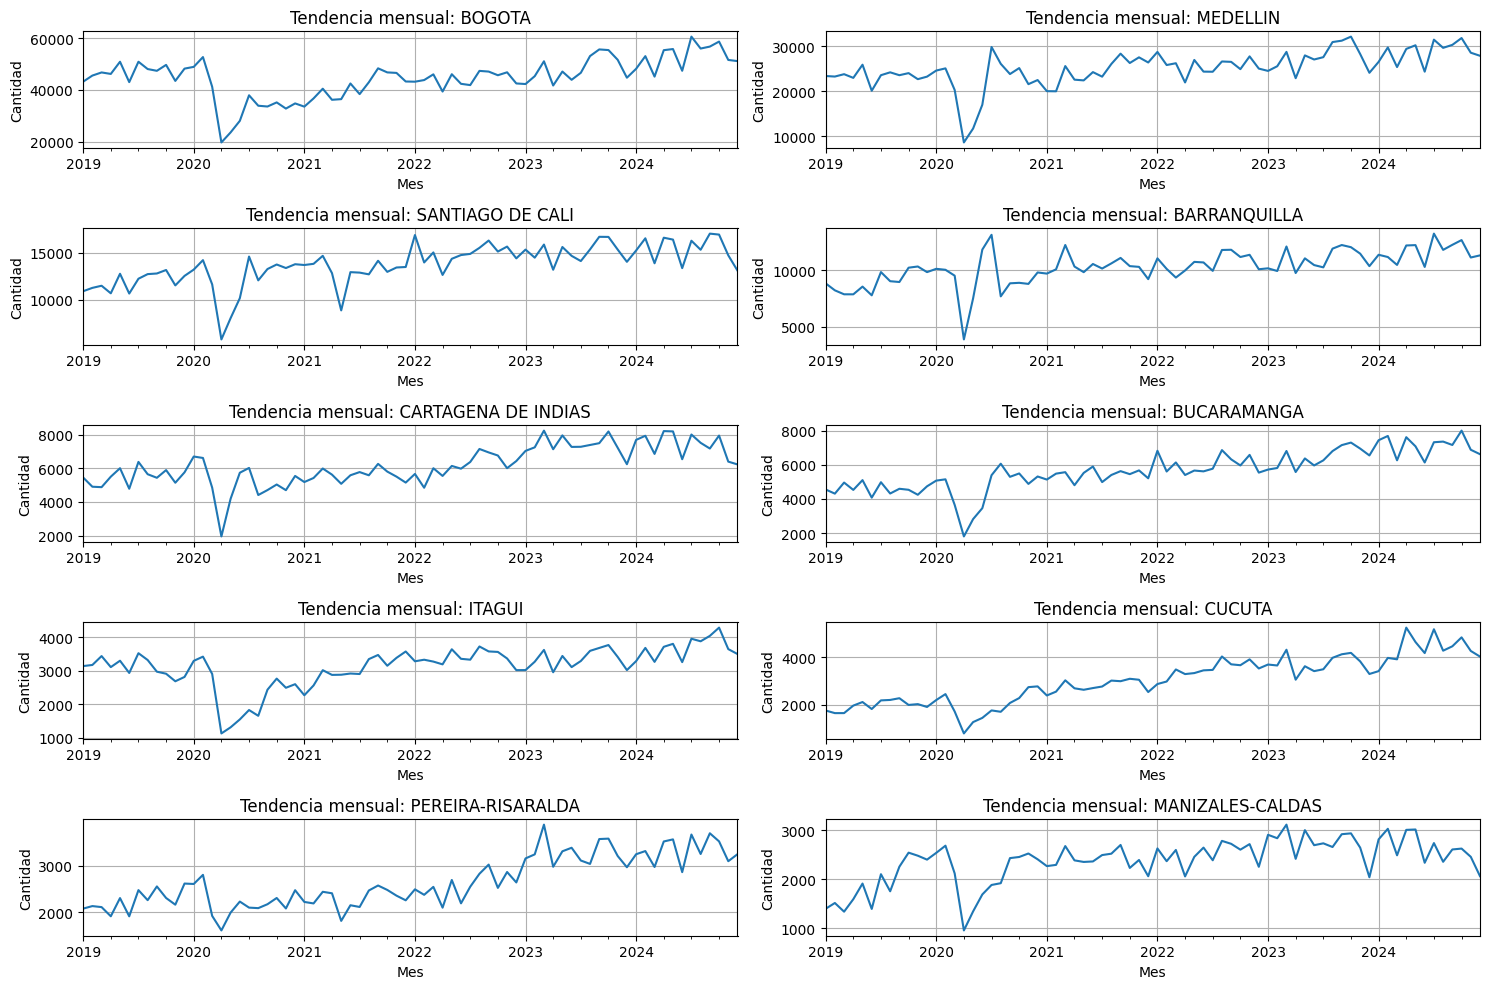

In [14]:
# Agrupar datos por municipio
datos_por_municipio = df_salud.groupby('MUNICIPIO').agg({
    'Cantidad': 'sum',
    'FECHA_ATENCION': 'count',
    'Concepto_Factura_Desc': lambda x: x.nunique(),
    'TIPIFICACION': lambda x: x.nunique()
}).reset_index()

# Renombrar columnas
datos_por_municipio.columns = ['Municipio', 'Total_Demanda', 'Num_Atenciones', 'Tipos_Servicio', 'Tipificaciones']

# Calcular promedio de demanda por atención
datos_por_municipio['Demanda_Promedio'] = datos_por_municipio['Total_Demanda'] / datos_por_municipio['Num_Atenciones']

# Visualizar estadísticas por municipio (todos los municipios)
print("Estadísticas por municipio:")
display(datos_por_municipio.sort_values('Total_Demanda', ascending=False))

# Analizar más a fondo los 10 municipios principales
top10_municipios = datos_por_municipio.nlargest(10, 'Total_Demanda')['Municipio'].tolist()

# Para cada municipio top, analizar la tendencia mensual
plt.figure(figsize=(15, 10))

for i, municipio in enumerate(top10_municipios):
    # Filtrar datos del municipio
    df_muni = df_salud[df_salud['MUNICIPIO'] == municipio]
    
    # Agrupar por mes
    df_muni_mes = df_muni.groupby(df_muni['FECHA_ATENCION'].dt.to_period('M'))['Cantidad'].sum()
    
    # Crear subgráfico
    plt.subplot(5, 2, i+1)
    df_muni_mes.plot()
    plt.title(f'Tendencia mensual: {municipio}')
    plt.xlabel('Mes')
    plt.ylabel('Cantidad')
    plt.grid(True)

plt.tight_layout()
plt.show()

**Patrones estacionales**

In [15]:
!pip install statsmodels


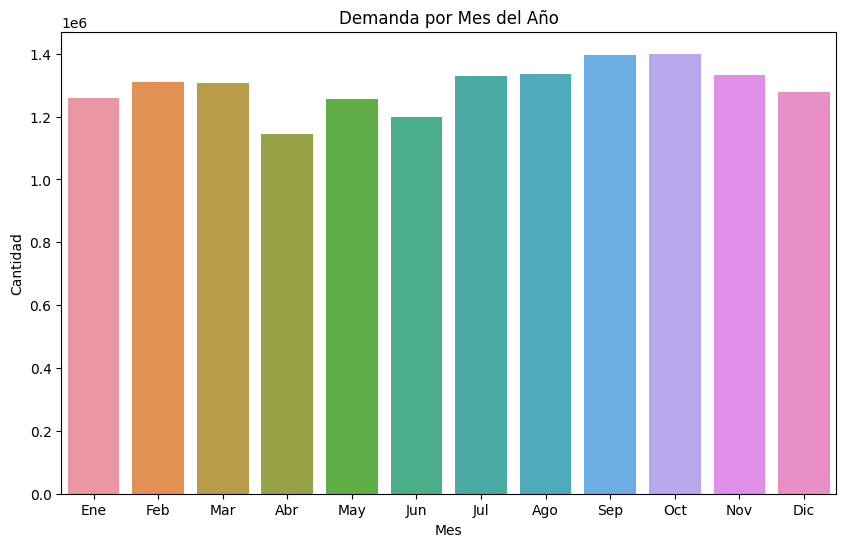

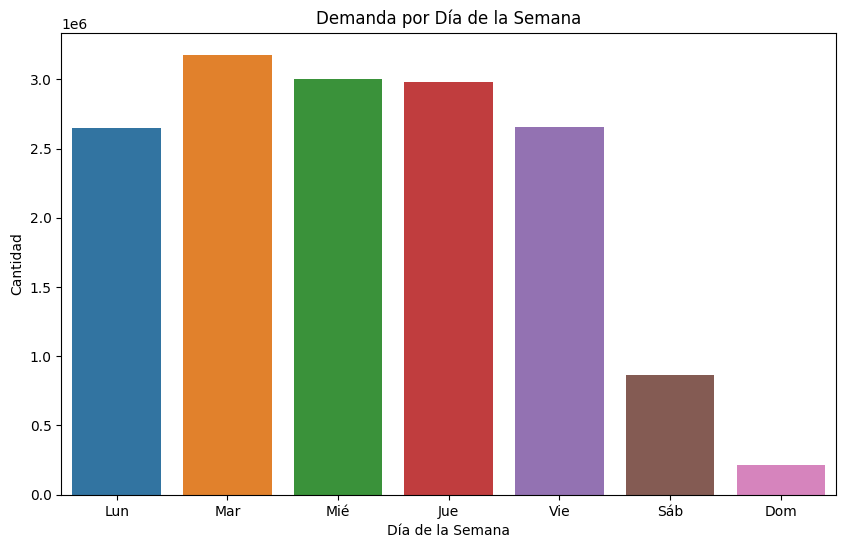

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

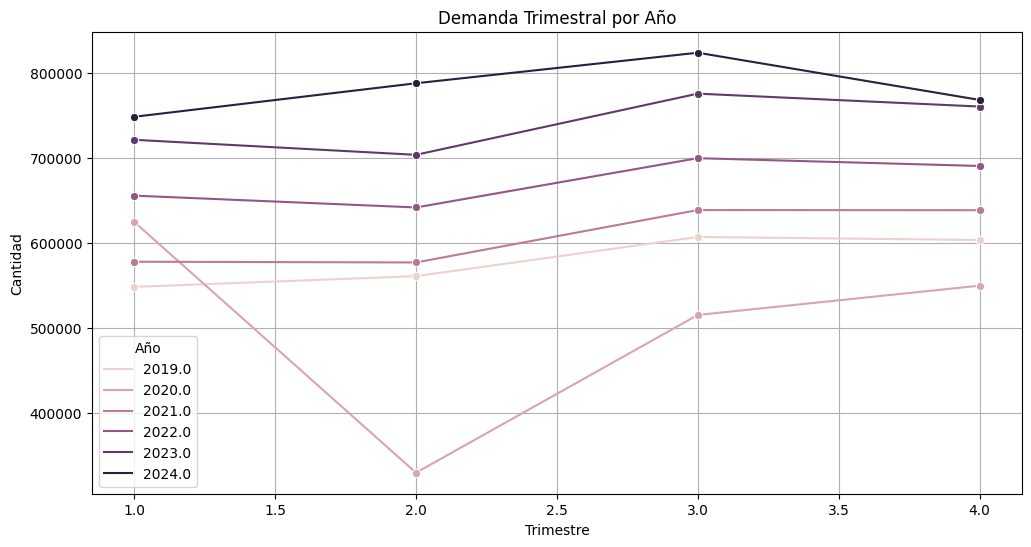

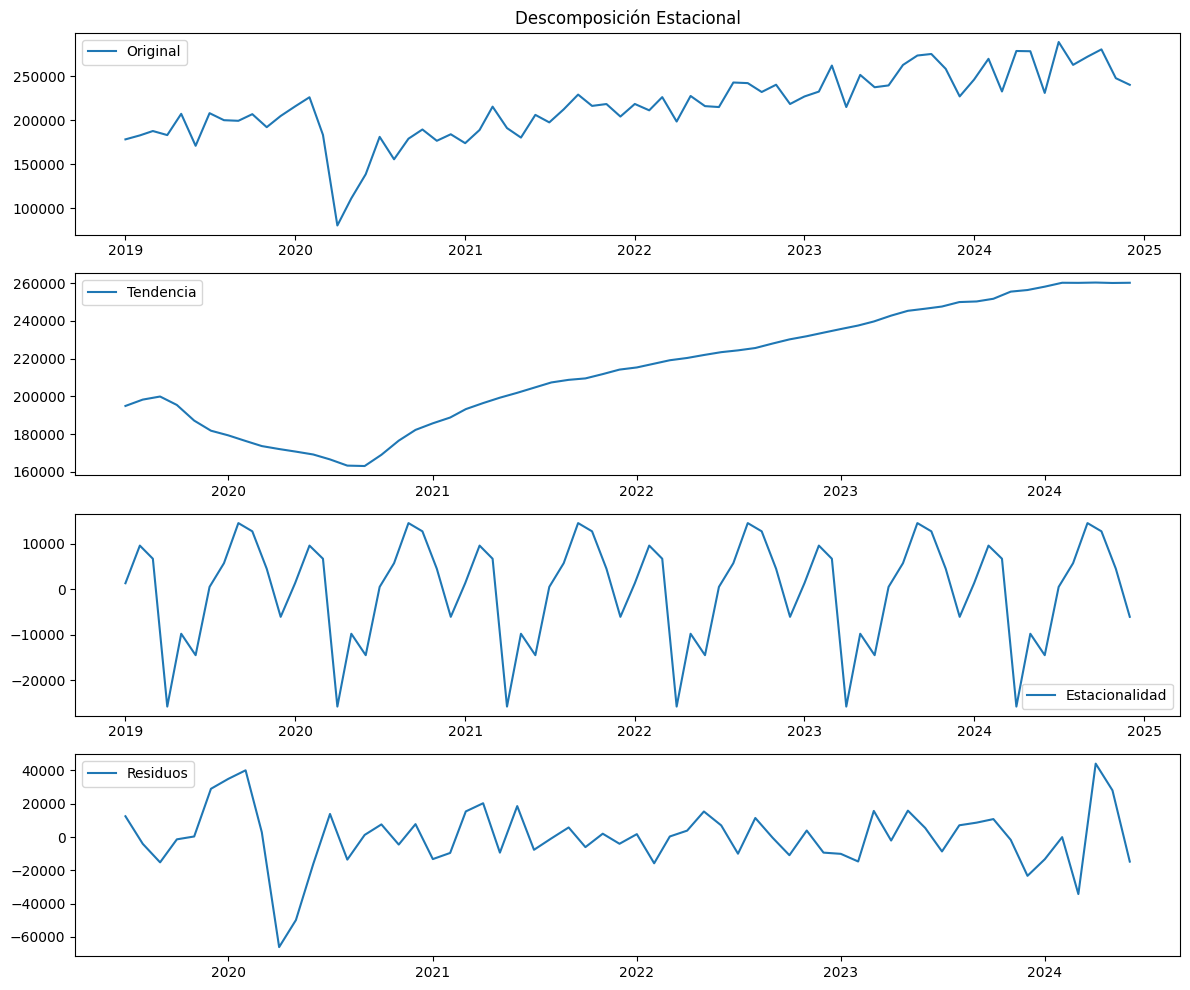

In [16]:
# Crear variables para diferentes medidas temporales
df_salud['Año'] = df_salud['FECHA_ATENCION'].dt.year
df_salud['Mes'] = df_salud['FECHA_ATENCION'].dt.month
df_salud['DiaSemana'] = df_salud['FECHA_ATENCION'].dt.dayofweek  # 0=Lunes, 6=Domingo
df_salud['DiaMes'] = df_salud['FECHA_ATENCION'].dt.day
df_salud['Trimestre'] = df_salud['FECHA_ATENCION'].dt.quarter

# 1. Análisis por mes del año
demanda_por_mes = df_salud.groupby('Mes')['Cantidad'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Mes', y='Cantidad', data=demanda_por_mes)
plt.title('Demanda por Mes del Año')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(range(12), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

# 2. Análisis por día de la semana
demanda_por_dia = df_salud.groupby('DiaSemana')['Cantidad'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='DiaSemana', y='Cantidad', data=demanda_por_dia)
plt.title('Demanda por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad')
plt.xticks(range(7), ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
plt.show()

# 3. Análisis por trimestre
demanda_por_trimestre = df_salud.groupby(['Año', 'Trimestre'])['Cantidad'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Trimestre', y='Cantidad', hue='Año', data=demanda_por_trimestre, marker='o')
plt.title('Demanda Trimestral por Año')
plt.xlabel('Trimestre')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()


# 4. Análisis de estacionalidad avanzado (descomposición)
from statsmodels.tsa.seasonal import seasonal_decompose

# Preparar serie temporal para decomposición
ts_data = df_salud.groupby(df_salud['FECHA_ATENCION'].dt.to_period('M'))['Cantidad'].sum()
ts_data.index = pd.to_datetime(ts_data.index.astype(str))

# Realizar descomposición estacional (si hay suficientes datos)
if len(ts_data) >= 24:  # Necesitamos al menos 2 años de datos
    decomposition = seasonal_decompose(ts_data, model='additive', period=12)
    
    # Graficar la descomposición
    plt.figure(figsize=(12, 10))
    plt.subplot(411)
    plt.plot(ts_data, label='Original')
    plt.legend(loc='best')
    plt.title('Descomposición Estacional')
    
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Tendencia')
    plt.legend(loc='best')
    
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Estacionalidad')
    plt.legend(loc='best')
    
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuos')
    plt.legend(loc='best')
    
    plt.tight_layout()
    plt.show()

**Detección de valores atípicos, datos faltantes y errores**

Total de valores faltantes por columna:
Siniestro_Diagnosti_Princi_Id       3
Nombre_Tipo_Atencion_Arp            3
Nombre_Departamento_IPS             3
Nombre_Establecimiento              3
Nombre_Municipio_Establecimiento    3
FECHA_ATENCION                      6
DSTIPO_EXAMEN                       3
CODIGO_PROCEDIMIENTO                3
Concepto_Factura_Desc               3
TIPIFICACION                        3
Cantidad                            0
Geogra_Municipio_Id                 0
MUNICIPIO                           0
Categoria_CIE10                     3
Mes                                 6
Año                                 6
DiaSemana                           6
DiaMes                              6
Trimestre                           6
dtype: int64


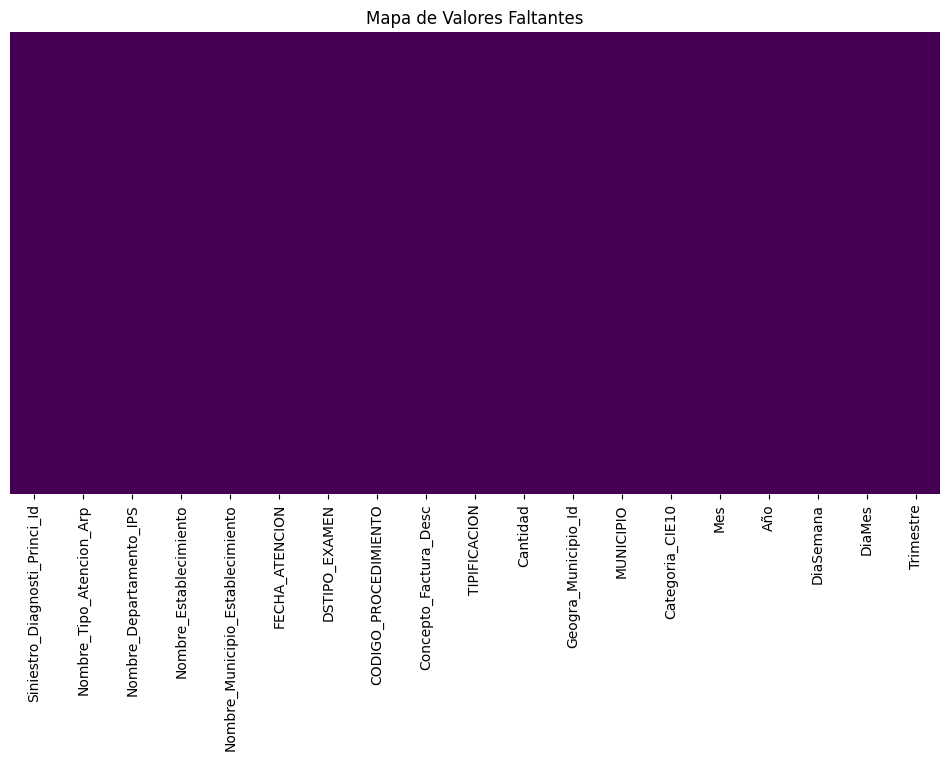

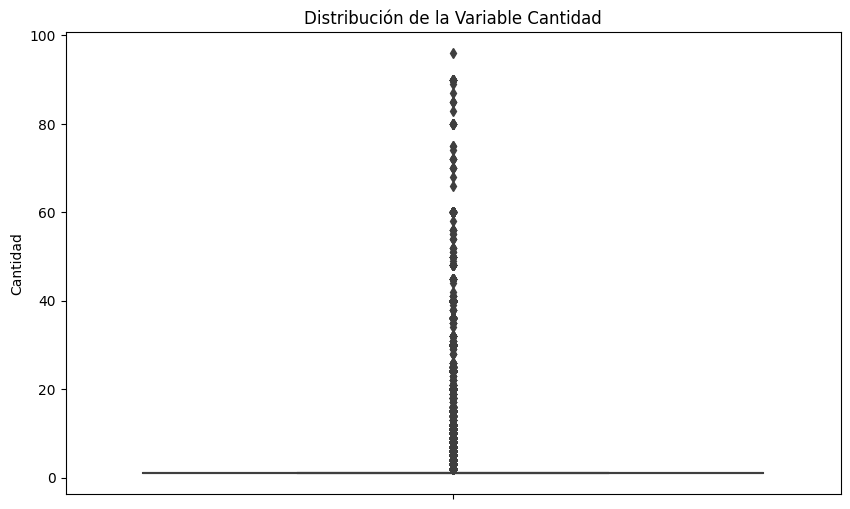

Valores atípicos - Límite inferior: 1.0, Límite superior: 1.0
Número de outliers: 1229040
Registros con cantidad negativa: 0
Registros con cantidad cero: 0
Rango de fechas: 2019-01-01 00:00:00 a 2024-12-31 22:35:00
Registros con fechas futuras: 0
Número de registros duplicados: 220152
Columna Concepto_Factura_Desc: 422 valores únicos
  ⚠️ Esta columna tiene muchos valores únicos, posible inconsistencia en nomenclatura
  Valores más comunes:
Concepto_Factura_Desc
MEDICAMENTOS AMBULATORIOS           1662060
CALIFICACIÓN DE ORIGEN AT           1338989
MSI -MEDICO SEGUIMIENTO INTEGRAL    1329373
SESIONES DE FISIOTERAPIA            1226561
CONSULTA ORTOPEDISTA                 573559
Name: count, dtype: int64
  Valores menos comunes:
Concepto_Factura_Desc
CAMA DE ACOMPAÑANTE CON ALIMENTACIÓN        1
APELACIÓN JUNTA NACIONAL PCL                1
CALIFICACION DE ORIGEN EL TELEMEDICIN(L)    1
APERTURA CASOS NO AVISADOS                  1
SEGUIMIENTO GIPAC (ALTA COMPLEJIDAD) (L)    1
Name: coun

<ipython-input-17-41a6d4f400cd>:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demanda_municipio = df_salud.groupby('Geogra_Municipio_Id')['Cantidad'].sum().reset_index()
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,Geogra_Municipio_Id,Cantidad,Concepto_Factura_Desc,max_cantidad,Porcentaje_Uso
0,1018,444054.0,AYUDAS DIAGNOSTICAS,24.0,1.850225e+06
1,1018,444054.0,OTROS PROCEDIMIENTOS HOSPITALARIOS,2.0,2.220270e+07
2,1018,444054.0,GASTOS QUIRURGICOS,2.0,2.220270e+07
3,1018,444054.0,MEDICAMENTOS AMBULATORIOS,34.0,1.306041e+06
4,1018,444054.0,INSUMOS DE OFTALMOLOGIA LENTES Y GAFAS,14.0,3.171814e+06
...,...,...,...,...,...
296303,3648,22.0,URGENCIAS MEDICO GENERAL,2.0,1.100000e+03
296304,3648,22.0,RADIOGRAFIA,1.0,2.200000e+03
296305,7376,5.0,CALIFICACIÓN DE ORIGEN AT,4.0,1.250000e+02
296306,7376,5.0,CONSULTA UROLOGIA,1.0,5.000000e+02


Municipios con baja utilización (uso < 20%):


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


,Geogra_Municipio_Id,Cantidad,Concepto_Factura_Desc,max_cantidad,Porcentaje_Uso
296291,115,2.0,CONSULTA MEDICO GENERAL,12.0,16.666667


In [17]:
# 1. Análisis de valores faltantes
print("Total de valores faltantes por columna:")
print(df_salud.isnull().sum())

# Visualización de valores faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(df_salud.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.show()

# 2. Detección de valores atípicos en la variable "Cantidad"
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_salud['Cantidad'])
plt.title('Distribución de la Variable Cantidad')
plt.ylabel('Cantidad')
plt.show()

# Cálculo de percentiles para identificar outliers
Q1 = df_salud['Cantidad'].quantile(0.25)
Q3 = df_salud['Cantidad'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Valores atípicos - Límite inferior: {lower_bound}, Límite superior: {upper_bound}")
print(f"Número de outliers: {df_salud[(df_salud['Cantidad'] < lower_bound) | (df_salud['Cantidad'] > upper_bound)].shape[0]}")

# 3. Análisis de valores inconsistentes
# Verificar si hay cantidades negativas o cero (que podrían ser erróneas)
print(f"Registros con cantidad negativa: {df_salud[df_salud['Cantidad'] < 0].shape[0]}")
print(f"Registros con cantidad cero: {df_salud[df_salud['Cantidad'] == 0].shape[0]}")

# 4. Verificación de fechas
min_date = df_salud['FECHA_ATENCION'].min()
max_date = df_salud['FECHA_ATENCION'].max()
print(f"Rango de fechas: {min_date} a {max_date}")

# Comprobar si hay fechas futuras (posteriores a la fecha actual)
future_dates = df_salud[df_salud['FECHA_ATENCION'] > pd.Timestamp.now()]
print(f"Registros con fechas futuras: {future_dates.shape[0]}")

# 5. Verificar duplicados exactos
duplicados = df_salud.duplicated()
print(f"Número de registros duplicados: {duplicados.sum()}")

# 6. Comprobar problemas potenciales en los valores categóricos
for col in ['Concepto_Factura_Desc', 'MUNICIPIO']:
    n_values = df_salud[col].nunique()
    print(f"Columna {col}: {n_values} valores únicos")
    
    # Si hay muchos valores únicos, puede haber inconsistencias
    if n_values > 100:  # Umbral arbitrario
        print("  ⚠️ Esta columna tiene muchos valores únicos, posible inconsistencia en nomenclatura")
        
        # Mostrar los valores más y menos frecuentes
        print("  Valores más comunes:")
        print(df_salud[col].value_counts().head())
        print("  Valores menos comunes:")
        print(df_salud[col].value_counts().tail())

# 7. Análisis de la capacidad máxima del prestador vs. demanda real
if 'Geogra_Municipio_Id' in df_salud.columns and 'Geogra_Municipio_Id' in df_prestadores.columns:
    # Agrupar demanda por municipio
    demanda_municipio = df_salud.groupby('Geogra_Municipio_Id')['Cantidad'].sum().reset_index()
    
    # Combinar con información de capacidad
    analisis_capacidad = demanda_municipio.merge(df_prestadores, on='Geogra_Municipio_Id', how='inner')
    analisis_capacidad['Porcentaje_Uso'] = (analisis_capacidad['Cantidad'] / analisis_capacidad['max_cantidad']) * 100
    
    # Identificar posibles problemas
    print("Municipios con posible sobrecarga (uso > 90%):")
    display(analisis_capacidad[analisis_capacidad['Porcentaje_Uso'] > 90])
    
    print("Municipios con baja utilización (uso < 20%):")
    display(analisis_capacidad[analisis_capacidad['Porcentaje_Uso'] < 20])

**Análisis de series temporales específico**

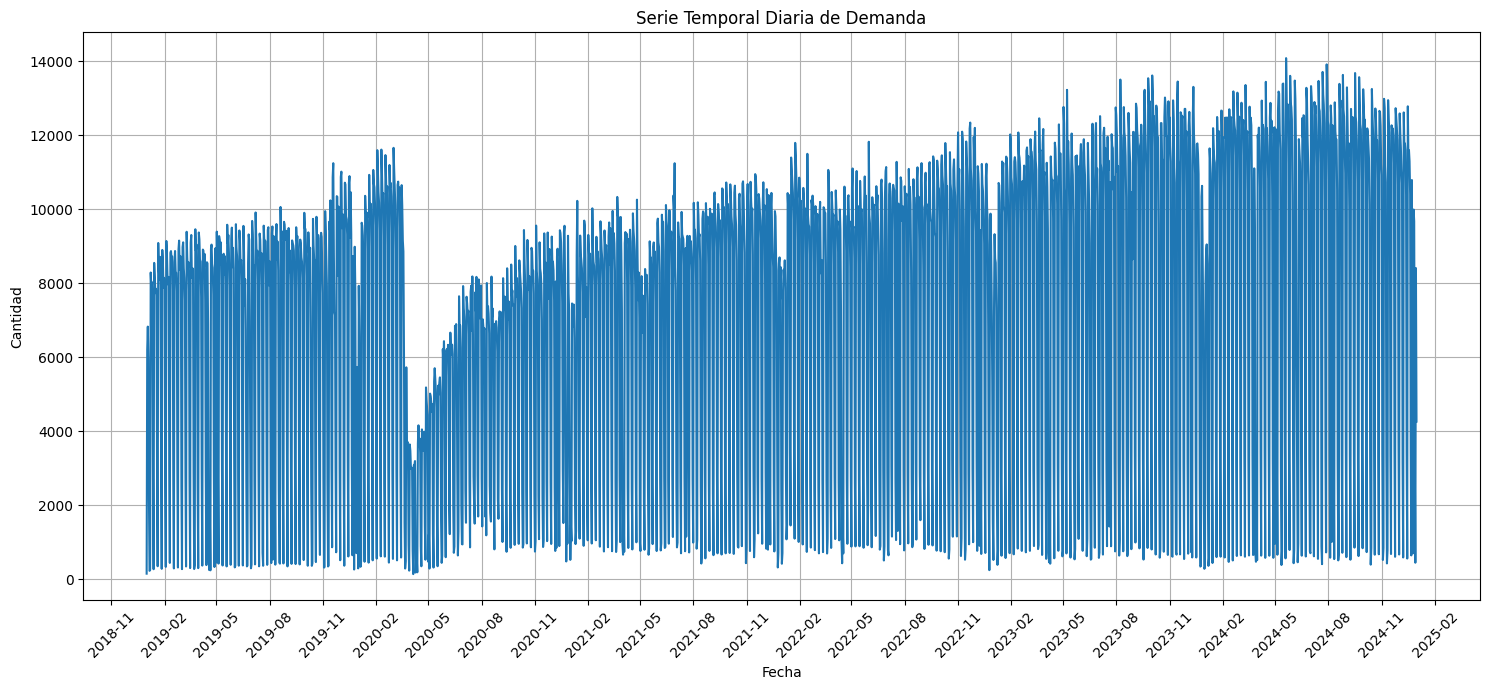

Prueba de Dickey-Fuller Aumentada:
Estadística de prueba: -4.201947405014798
Valor p: 0.0006539167094343767
Valores críticos: {'1%': -3.4333684674663467, '5%': -2.8628734534635902, '10%': -2.5674798640234444}
La serie es estacionaria (rechazamos H0)


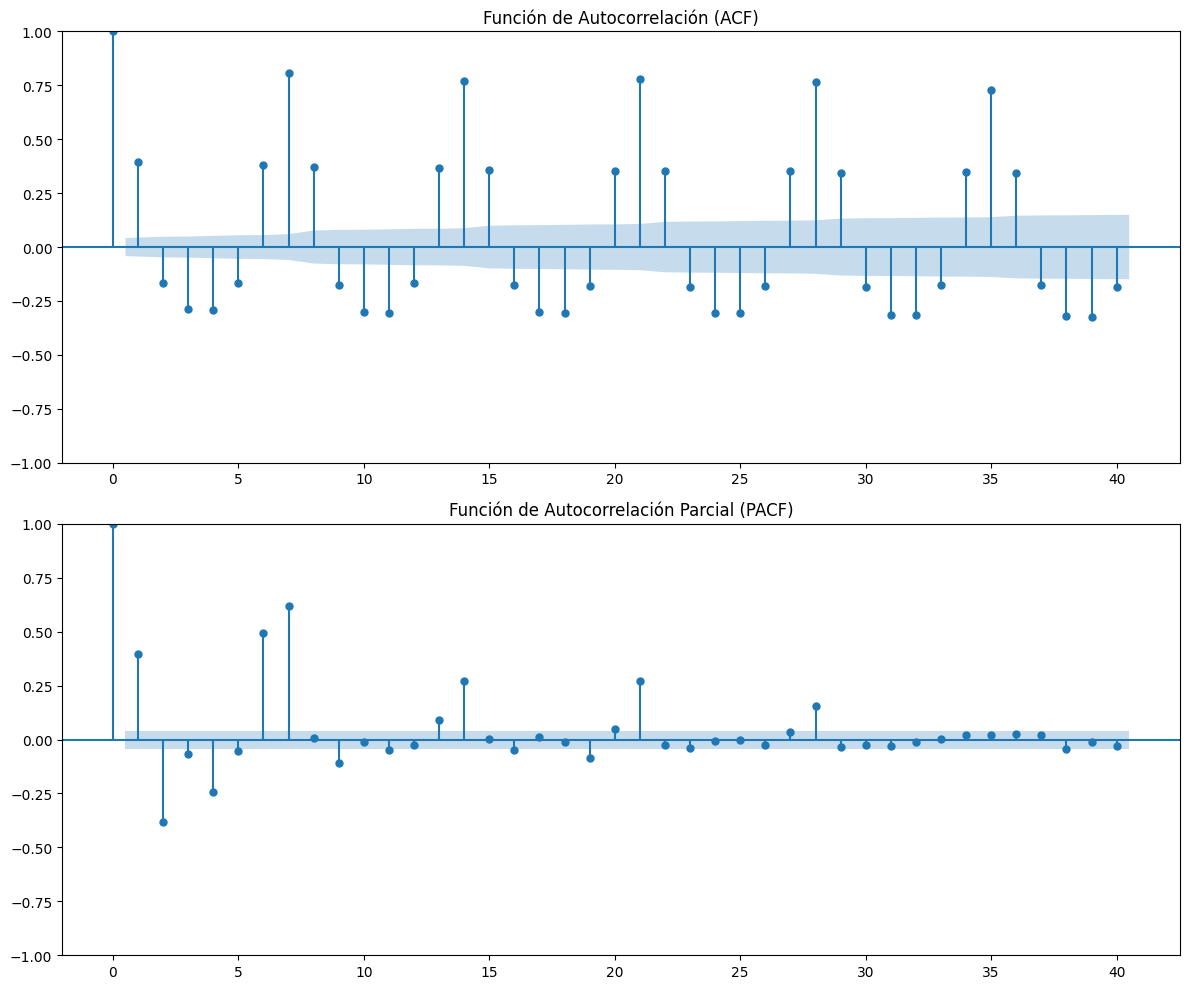

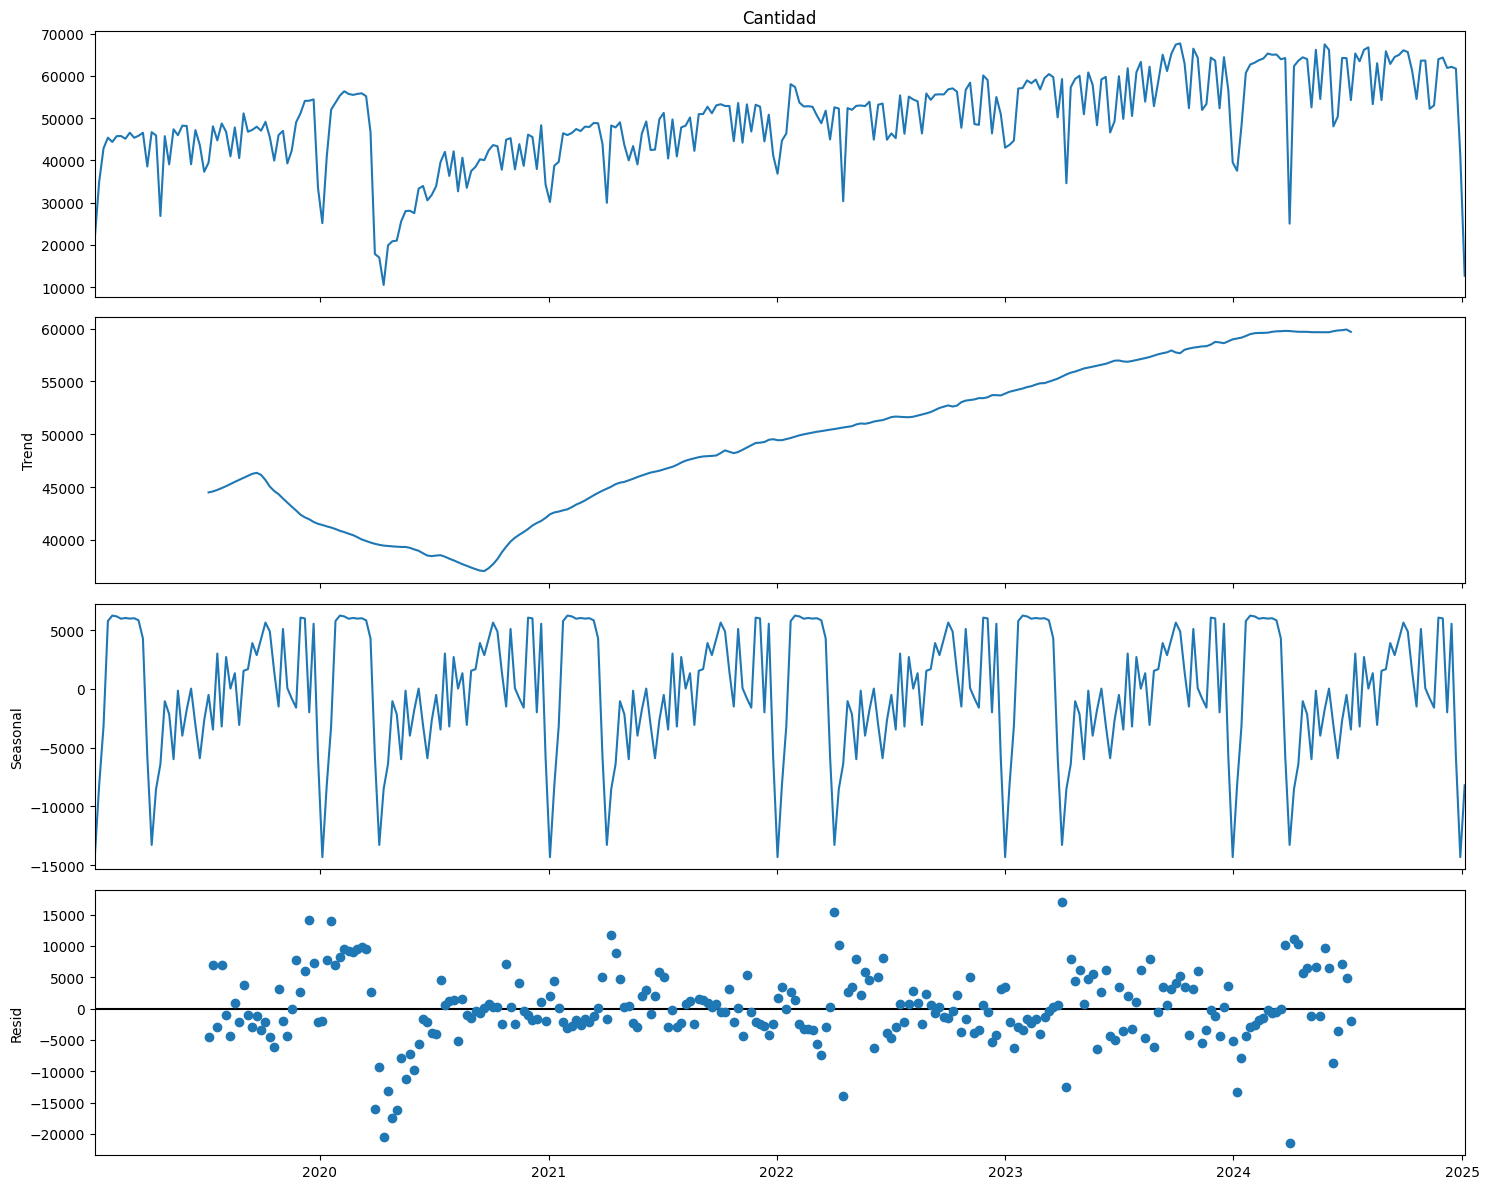

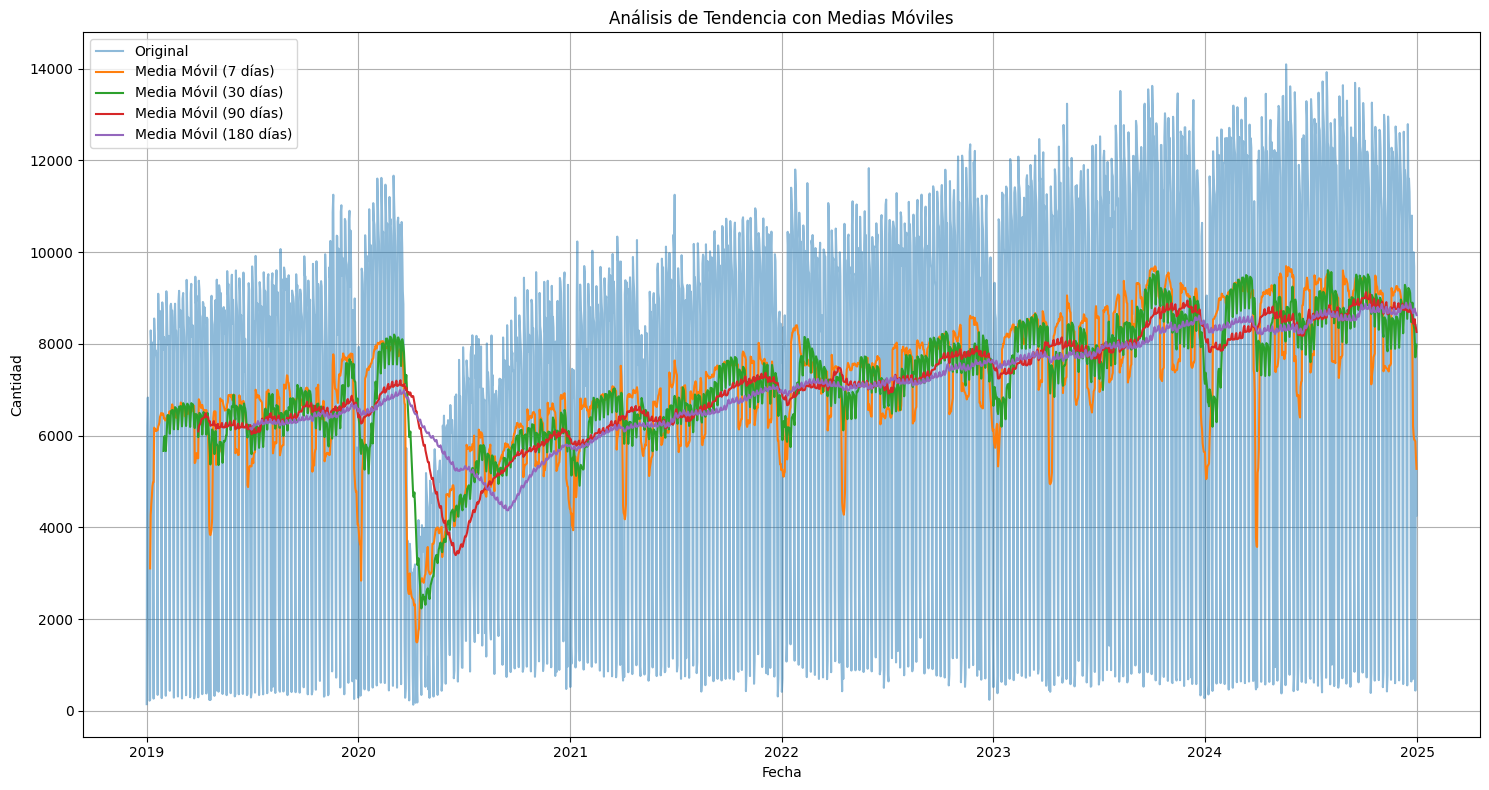

In [18]:
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller, acf, pacf
import statsmodels.api as sm

# Preparar serie temporal diaria
ts_diaria = df_salud.groupby(df_salud['FECHA_ATENCION'].dt.date)['Cantidad'].sum()
ts_diaria.index = pd.to_datetime(ts_diaria.index)

# 1. Visualizar la serie temporal completa
plt.figure(figsize=(15, 7))
plt.plot(ts_diaria)
plt.title('Serie Temporal Diaria de Demanda')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Analizar la estacionariedad de la serie
result = adfuller(ts_diaria.dropna())
print('Prueba de Dickey-Fuller Aumentada:')
print(f'Estadística de prueba: {result[0]}')
print(f'Valor p: {result[1]}')
print(f'Valores críticos: {result[4]}')
if result[1] <= 0.05:
    print("La serie es estacionaria (rechazamos H0)")
else:
    print("La serie no es estacionaria (no rechazamos H0)")

# 3. Analizar autocorrelación
plt.figure(figsize=(12, 10))

# ACF
plt.subplot(211)
sm.graphics.tsa.plot_acf(ts_diaria.dropna(), lags=40, ax=plt.gca())
plt.title('Función de Autocorrelación (ACF)')

# PACF
plt.subplot(212)
sm.graphics.tsa.plot_pacf(ts_diaria.dropna(), lags=40, ax=plt.gca())
plt.title('Función de Autocorrelación Parcial (PACF)')

plt.tight_layout()
plt.show()

# 4. Descomposición de la serie temporal (tendencia, estacionalidad, residuos)
# Usar la serie semanal para reducir el ruido
ts_semanal = df_salud.groupby(pd.Grouper(key='FECHA_ATENCION', freq='W'))['Cantidad'].sum()

# Realizar descomposición
descomposicion = sm.tsa.seasonal_decompose(ts_semanal, model='additive', period=52)

# Graficar
fig = descomposicion.plot()
fig.set_size_inches(15, 12)
plt.tight_layout()
plt.show()

# 5. Análisis de venta móvil para detectar tendencias a largo plazo
ventanas = [7, 30, 90, 180]
plt.figure(figsize=(15, 8))

plt.plot(ts_diaria, alpha=0.5, label='Original')

for ventana in ventanas:
    ts_ma = ts_diaria.rolling(window=ventana).mean()
    plt.plot(ts_ma, label=f'Media Móvil ({ventana} días)')

plt.title('Análisis de Tendencia con Medias Móviles')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Limpieza de Datos**

In [19]:
from datetime import datetime, timedelta
import unicodedata
from difflib import get_close_matches

# 1. Handle duplicates
print(f"Shape before removing duplicates: {df_salud.shape}")
df_salud = df_salud.drop_duplicates()
print(f"Shape after removing duplicates: {df_salud.shape}")

# 2. Clean location data
# Fix "?" values in municipios - replace with NaN for now
df_salud['MUNICIPIO'] = df_salud['MUNICIPIO'].replace(['?'], np.nan)

# Standardize municipality names (capitalize properly)
df_salud['MUNICIPIO'] = df_salud['MUNICIPIO'].str.title()
df_salud['Nombre_Departamento_IPS'] = df_salud['Nombre_Departamento_IPS'].str.title()

print(f"Outlier bounds - Lower: {lower_bound}, Upper: {upper_bound}")
print(f"Outliers count: {df_salud[(df_salud['Cantidad'] < lower_bound) | (df_salud['Cantidad'] > upper_bound)].shape[0]}")

# Create a copy of the dataframe with outliers capped/floored
# Create a copy of the dataframe to work with
df_salud_cleaned = df_salud.copy()

# Log transform the 'Cantidad' variable
# Adding 1 to handle zeros (log(0) is undefined)
df_salud_cleaned['Cantidad_log'] = np.log(df_salud_cleaned['Cantidad'])

def remove_accents(text: str) -> str:
    """
    Quita las marcas diacríticas de una cadena (acentos).
    """
    nfkd = unicodedata.normalize('NFKD', text)
    return ''.join(c for c in nfkd if not unicodedata.combining(c))

# Pipeline único de limpieza y estandarización
df_salud_cleaned['MUNICIPIO'] = (
    df_salud_cleaned['MUNICIPIO']
    .fillna('')                            # 1) Reemplaza NaN por cadena
    .str.partition('-')[0]                 # 2) Toma todo lo anterior al primer guión
    .str.strip()                           # 3) Elimina espacios extras
    .str.lower()                           # 4) Pasa a minúsculas
    .apply(remove_accents)                 # 5) Quita acentos
    .str.title()                           # 6) Capitaliza cada palabra
)

# Si quieres, conviertes a category para ahorrar memoria
df_salud_cleaned['MUNICIPIO'] = df_salud_cleaned['MUNICIPIO'].astype('category')



# 6. Data consistency check after cleaning
print("\nData summary after cleaning:")
print(f"Total records: {df_salud_cleaned.shape[0]}")
print(f"Missing municipality names: {df_salud_cleaned['MUNICIPIO'].isna().sum()}")
print(f"Date range: {df_salud_cleaned['FECHA_ATENCION'].min()} to {df_salud_cleaned['FECHA_ATENCION'].max()}")
print(f"Cantidad capped: {df_salud_cleaned['Cantidad_log'].min()} to {df_salud_cleaned['Cantidad_log'].max()}")

Shape before removing duplicates: (11716416, 19)
Shape after removing duplicates: (11496264, 19)
Outlier bounds - Lower: 1.0, Upper: 1.0
Outliers count: 1179993

Data summary after cleaning:
Total records: 11496264
Missing municipality names: 0
Date range: 2019-01-01 00:00:00 to 2024-12-31 22:35:00
Cantidad capped: 0.0 to 4.564348191467836


# **Featuring engineering**

In [20]:
!pip install category_encoders
!pip install holidays

In [21]:
from datetime import timedelta
from category_encoders import TargetEncoder
import holidays

# Función para crear características temporales
def create_time_features(df):
    """
    Crea características temporales sin modificar la granularidad de municipios y servicios
    """
    # Asegurarse de que FECHA_ATENCION es datetime
    df['FECHA_ATENCION'] = pd.to_datetime(df['FECHA_ATENCION'])
    
    # 1. Características de calendario
    df['year'] = df['FECHA_ATENCION'].dt.year
    df['month'] = df['FECHA_ATENCION'].dt.month
    df['day'] = df['FECHA_ATENCION'].dt.day
    df['dayofweek'] = df['FECHA_ATENCION'].dt.dayofweek
    df['quarter'] = df['FECHA_ATENCION'].dt.quarter
    df['weekofyear'] = df['FECHA_ATENCION'].dt.isocalendar().week
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
    df['days_in_month'] = df['FECHA_ATENCION'].dt.days_in_month
    
    # Días desde el inicio del dataset
    min_date = df['FECHA_ATENCION'].min()
    df['days_from_start'] = (df['FECHA_ATENCION'] - min_date).dt.days
    
    # Aproximación para feriados en Colombia
    try:
        co_holidays = holidays.Colombia()
        df['is_holiday'] = df['FECHA_ATENCION'].dt.date.isin(co_holidays).astype(int)
    except:
        print("Paquete holidays no disponible. Omitiendo feriados.")
    
    # 2. Características cíclicas (mejor representación de variables circulares)
    df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
    df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
    df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek']/7)
    df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek']/7)
    df['day_sin'] = np.sin(2 * np.pi * df['day']/df['days_in_month'])
    df['day_cos'] = np.cos(2 * np.pi * df['day']/df['days_in_month'])
    
    # 3. Características específicas para salud
    # Períodos COVID-19 (ahora después de crear year y month)
    # Pre-pandemia (antes de marzo 2020)
    df['pre_covid'] = ((df['year'] < 2020) | ((df['year'] == 2020) & (df['month'] < 3))).astype(int)
    
    # Período de pandemia (marzo 2020 - diciembre 2021)
    df['covid_season'] = (((df['year'] == 2020) & (df['month'] >= 3)) | 
                         (df['year'] == 2021)).astype(int)
    
    # Post-emergencia (2022 en adelante)
    df['post_emergency'] = (df['year'] >= 2022).astype(int)
    
    return df
    

# Función para crear características de lag y ventana móvil por grupo
def create_lag_and_window_features(df, id_columns=['MUNICIPIO', 'Concepto_Factura_Desc']):
    """
    Crea características de rezago y ventana móvil para cada combinación de municipio y tipo de servicio
    """
    # Crear una copia para no modificar el original
    #display(df.head())
    result_df = df.copy()
    
    
    # Ordenar por grupos y fecha
    result_df = result_df.sort_values(id_columns + ['FECHA_ATENCION'])
    
    # Agrupar los datos
    grouped = result_df.groupby(id_columns)
    
    # Variables para almacenar los lag features
    lag_features = ['lag_7d', 'lag_30d', 'lag_365d',
                   'rolling_mean_7d', 'rolling_mean_30d', 
                   'rolling_std_7d', 'rolling_std_30d',
                   'rolling_max_7d', 'rolling_min_7d']
    
    # Inicializar columnas de lag con NaN
    for feature in lag_features:
        result_df[feature] = np.nan
    
    # Procesar cada grupo individualmente
    for name, group in grouped:
        # Ordenar por fecha
        group = group.sort_values('FECHA_ATENCION')
        
        # Índices del grupo en el dataframe original
        indices = group.index
        
        # Características de rezago (lag)
        result_df.loc[indices, 'lag_7d'] = group['Cantidad'].shift(7)
        result_df.loc[indices, 'lag_30d'] = group['Cantidad'].shift(30)
        result_df.loc[indices, 'lag_365d'] = group['Cantidad'].shift(365)
        
        # Características de ventana móvil (rolling window)
        result_df.loc[indices, 'rolling_mean_7d'] = group['Cantidad'].rolling(window=7).mean().shift(1)
        result_df.loc[indices, 'rolling_mean_30d'] = group['Cantidad'].rolling(window=30).mean().shift(1)
        
        result_df.loc[indices, 'rolling_std_7d'] = group['Cantidad'].rolling(window=7).std().shift(1)
        result_df.loc[indices, 'rolling_std_30d'] = group['Cantidad'].rolling(window=30).std().shift(1)
        
        result_df.loc[indices, 'rolling_max_7d'] = group['Cantidad'].rolling(window=7).max().shift(1)
        result_df.loc[indices, 'rolling_min_7d'] = group['Cantidad'].rolling(window=7).min().shift(1)
    
    return result_df

# Función para crear características estadísticas por municipio/servicio
def create_statistical_features(df, id_columns=['MUNICIPIO', 'Concepto_Factura_Desc']):
    """
    Crea características estadísticas agregadas por municipio, tipo de servicio y combinaciones temporales
    """
    # Copiar el dataframe
    result_df = df.copy()
    
    # Extraer componentes de fecha
    result_df['year_month'] = result_df['FECHA_ATENCION'].dt.to_period('M')
    
    # 1. Estadísticas globales por municipio
    muni_stats = df.groupby('MUNICIPIO')['Cantidad'].agg(['mean', 'std', 'median']).reset_index()
    muni_stats.columns = ['MUNICIPIO', 'municipio_mean', 'municipio_std', 'municipio_median']
    
    # 2. Estadísticas globales por tipo de servicio
    service_stats = df.groupby('Concepto_Factura_Desc')['Cantidad'].agg(['mean', 'std', 'median']).reset_index()
    service_stats.columns = ['Concepto_Factura_Desc', 'service_mean', 'service_std', 'service_median']
    
    # 3. Estadísticas por mes del año para cada municipio
    month_muni_stats = df.groupby(['MUNICIPIO', df['FECHA_ATENCION'].dt.month])['Cantidad'].agg(['mean']).reset_index()
    month_muni_stats.columns = ['MUNICIPIO', 'month', 'municipio_month_mean']
    
    # 4. Estadísticas por mes del año para cada tipo de servicio
    month_service_stats = df.groupby(['Concepto_Factura_Desc', df['FECHA_ATENCION'].dt.month])['Cantidad'].agg(['mean']).reset_index()
    month_service_stats.columns = ['Concepto_Factura_Desc', 'month', 'service_month_mean']
    
    # Hacer merge de las estadísticas
    result_df = pd.merge(result_df, muni_stats, on='MUNICIPIO', how='left')
    result_df = pd.merge(result_df, service_stats, on='Concepto_Factura_Desc', how='left')
    result_df = pd.merge(result_df, month_muni_stats, on=['MUNICIPIO', 'month'], how='left')
    result_df = pd.merge(result_df, month_service_stats, on=['Concepto_Factura_Desc', 'month'], how='left')
    
    # Calcular características relativas
    result_df['cantidad_vs_muni_avg'] = result_df['Cantidad'] / result_df['municipio_mean']
    result_df['cantidad_vs_service_avg'] = result_df['Cantidad'] / result_df['service_mean']
    result_df['cantidad_vs_muni_month_avg'] = result_df['Cantidad'] / result_df['municipio_month_mean']
    result_df['cantidad_vs_service_month_avg'] = result_df['Cantidad'] / result_df['service_month_mean']
    
    return result_df

# Función para codificar variables categóricas
def encode_categorical_variables(df, target_col='Cantidad'):
    """
    Codifica variables categóricas usando Target Encoding
    """
    # Columnas categóricas a codificar
    cat_cols = ['MUNICIPIO', 'Concepto_Factura_Desc']
    
    # Inicializar el Target Encoder
    encoder = TargetEncoder()
    
    # Ajustar y transformar
    df_encoded = df.copy()
    
    # Codificar cada columna individualmente
    for col in cat_cols:
        encoded_col = encoder.fit_transform(df[col], df[target_col])
        df_encoded[f'{col}_encoded'] = encoded_col
        
    return df_encoded

# Función principal para el feature engineering
def feature_engineering_pipeline(df):
    """
    Pipeline completo de feature engineering
    """
    print("1. Optimizando tipos de datos...")
    # Convertir categóricas a tipo category para ahorrar memoria
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('category')
    
    # Optimizar tipos de datos numéricos
    for col in df.select_dtypes(include=['int']).columns:
        df[col] = df[col].astype('int32')
    
    for col in df.select_dtypes(include=['float']).columns:
        df[col] = df[col].astype('float32')
    
    print("2. Creando características temporales...")
    df = create_time_features(df)
    
    print("3. Creando características de rezago y ventana móvil...")
    df = create_lag_and_window_features(df)
    
    print("4. Creando características estadísticas...")
    df = create_statistical_features(df)
    
    print("5. Codificando variables categóricas...")
    df = encode_categorical_variables(df)
    
    print("6. Limpiando dataset final...")
    # Eliminar filas con NaN debido a los lags
    df_final = df.dropna()
    
    return df_final

In [22]:
def process_in_batches(df, batch_size=500000):
    """
    Procesa el DataFrame en lotes para evitar problemas de memoria
    """
    all_results = []
    
    # Agrupar por MUNICIPIO y Concepto_Factura_Desc para mantener los grupos intactos
    groups = df.groupby(['MUNICIPIO', 'Concepto_Factura_Desc'])
    
    batch_num = 1
    current_batch = []
    current_size = 0
    
    for name, group in groups:
        # Si añadir este grupo excedería el tamaño del lote, procesar el lote actual
        if current_size + len(group) > batch_size and current_size > 0:
            #print(f"Procesando lote {batch_num} con {current_size} registros...")
            batch_df = pd.concat(current_batch)
            processed_batch = feature_engineering_pipeline(batch_df)
            all_results.append(processed_batch)
            
            # Reiniciar para el siguiente lote
            current_batch = [group]
            current_size = len(group)
            batch_num += 1
        else:
            current_batch.append(group)
            current_size += len(group)

        
    
    # Procesar el último lote si hay datos
    if current_batch:
        print(f"Procesando lote final {batch_num} con {current_size} registros...")
        batch_df = pd.concat(current_batch)
        processed_batch = feature_engineering_pipeline(batch_df)
        all_results.append(processed_batch)
    
    # Combinar todos los resultados
    return pd.concat(all_results) if all_results else pd.DataFrame()

In [ ]:
df_salud_final = process_in_batches(df_salud_cleaned)

In [ ]:
# Importar bibliotecas necesarias
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_feature_importance(X, y):
    """
    Evalúa la importancia de las características utilizando múltiples métodos
    """
    # 1. Importancia basada en correlación (Pearson)
    corr = pd.DataFrame(X.corrwith(y).sort_values(ascending=False))
    corr.columns = ['Correlación con Cantidad']
    
    # 2. Importancia basada en Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    rf_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importancia RF': rf.feature_importances_
    }).sort_values('Importancia RF', ascending=False)
    
    # 3. Información mutua (para capturar relaciones no lineales)
    mi = mutual_info_regression(X, y)
    mi_importance = pd.DataFrame({
        'Feature': X.columns,
        'Información Mutua': mi
    }).sort_values('Información Mutua', ascending=False)
    
    return corr, rf_importance, mi_importance

# Aplicar la función a nuestros datos
# Separar características y target
X = df_salud_final.drop(['Cantidad', 'FECHA_ATENCION'], axis=1)
y = df_salud_final['Cantidad']

corr_importance, rf_importance, mi_importance = evaluate_feature_importance(X, y)

# Visualizar las 20 características más importantes según cada método
plt.figure(figsize=(15, 20))

plt.subplot(3, 1, 1)
corr_importance.iloc[:20].plot(kind='barh')
plt.title('Top 20 Características por Correlación con Target')

plt.subplot(3, 1, 2)
plt.barh(rf_importance['Feature'].iloc[:20], rf_importance['Importancia RF'].iloc[:20])
plt.title('Top 20 Características por Importancia en Random Forest')

plt.subplot(3, 1, 3)
plt.barh(mi_importance['Feature'].iloc[:20], mi_importance['Información Mutua'].iloc[:20])
plt.title('Top 20 Características por Información Mutua')

plt.tight_layout()
plt.show()

In [ ]:
def select_features(X, y, n_features=30):
    """
    Implementa varios métodos de selección de características y devuelve
    las características seleccionadas por cada método
    """
    features = X.columns.tolist()
    results = {}
    
    # 1. Selección basada en correlación (valor absoluto)
    corr_vals = X.corrwith(y).abs()
    selected_corr = corr_vals.sort_values(ascending=False).index[:n_features].tolist()
    results['correlation'] = selected_corr
    
    # 2. Selección basada en Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    importance = pd.Series(rf.feature_importances_, index=features)
    selected_rf = importance.sort_values(ascending=False).index[:n_features].tolist()
    results['random_forest'] = selected_rf
    
    # 3. Recursive Feature Elimination (RFE)
    from sklearn.feature_selection import RFE
    rfe = RFE(estimator=RandomForestRegressor(n_estimators=50, random_state=42), 
              n_features_to_select=n_features)
    rfe.fit(X, y)
    selected_rfe = [features[i] for i in range(len(features)) if rfe.support_[i]]
    results['rfe'] = selected_rfe
    
    # 4. Selección basada en información mutua
    mi = mutual_info_regression(X, y)
    mi_series = pd.Series(mi, index=features)
    selected_mi = mi_series.sort_values(ascending=False).index[:n_features].tolist()
    results['mutual_info'] = selected_mi
    
    # Identificar características comunes entre métodos
    common_features = set(selected_corr)
    for method in ['random_forest', 'rfe', 'mutual_info']:
        common_features = common_features.intersection(set(results[method]))
    
    results['common'] = list(common_features)
    
    return results

# Ejecutar la selección de características
selected_features = select_features(X, y, n_features=30)

# Mostrar las características comunes a todos los métodos
print(f"Características seleccionadas por todos los métodos: {len(selected_features['common'])}")
print(selected_features['common'])

# Crear un DataFrame con las características seleccionadas
X_selected = X[selected_features['random_forest']]  # Podemos usar cualquiera de los métodos

In [ ]:
def evaluate_multicollinearity(X):
    """
    Evalúa la multicolinealidad entre las características
    """
    # Matriz de correlación
    corr_matrix = X.corr()
    
    # Visualizar la matriz de correlación
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', 
                vmin=-1, vmax=1, linewidths=0.5)
    plt.title('Matriz de Correlación entre Características')
    plt.tight_layout()
    plt.show()
    
    # Identificar pares altamente correlacionados
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.8:  # Umbral de 0.8
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], 
                                       corr_matrix.iloc[i, j]))
    
    # Ordenar por valor absoluto de correlación
    high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    
    # Calcular VIF para cada variable
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    # Tomar una muestra aleatoria si el dataset es muy grande
    if len(X) > 10000:
        X_sample = X.sample(10000, random_state=42)
    else:
        X_sample = X
        
    # Calcular VIF
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_sample.columns
    vif_data["VIF"] = [variance_inflation_factor(X_sample.values, i) 
                      for i in range(X_sample.shape[1])]
    
    # Ordenar por VIF
    vif_data = vif_data.sort_values("VIF", ascending=False)
    
    return high_corr_pairs, vif_data

# Aplicar la función a nuestras características
high_corr_pairs, vif_data = evaluate_multicollinearity(X_selected)

# Mostrar pares altamente correlacionados
print("Pares de características altamente correlacionadas:")
for pair in high_corr_pairs[:20]:  # Mostrar los 20 pares más correlacionados
    print(f"{pair[0]} y {pair[1]}: {pair[2]:.4f}")

# Mostrar factores de inflación de varianza
print("\nFactores de Inflación de Varianza (VIF):")
print(vif_data.head(20))  # Mostrar las 20 características con mayor VIF

# Función para eliminar características colineales
def remove_collinear_features(X, threshold=0.8):
    """
    Elimina características altamente correlacionadas
    """
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Identificar columnas a eliminar
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    print(f"Se eliminarán {len(to_drop)} características colineales")
    
    # Retornar el dataframe sin las columnas colineales
    return X.drop(columns=to_drop)

# Aplicar la eliminación de características colineales
X_reduced = remove_collinear_features(X_selected, threshold=0.8)
print(f"Características restantes: {X_reduced.shape[1]}")